In [22]:
import streamlit as st
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
plants = pd.read_csv("combined.csv")
plant_errors = plants[plants["error"].notnull()]
plant_data = plants[~plants["error"].notnull()]
plants_to_display = ["Epipremnum Aureum","Venus flytrap","Cactus"]

<Axes: xlabel='api_id', ylabel='error'>

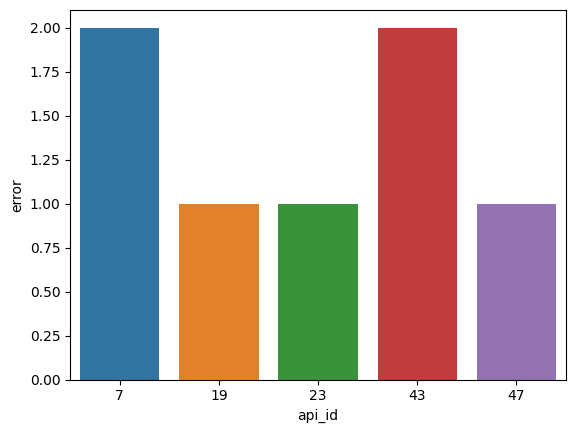

In [24]:
each_plant_error = plant_errors.groupby(["api_id"], as_index=True)
error_count = each_plant_error.count().reset_index()
error_count
sns.barplot(data=error_count, x="api_id", y="error")

<Axes: xlabel='plant_name', ylabel='soil_moisture'>

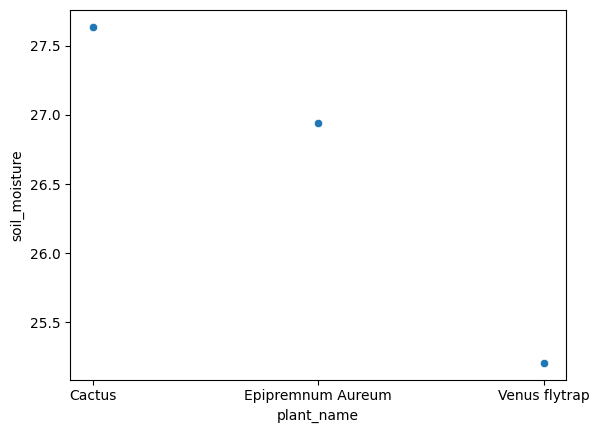

In [25]:
chosen_plants = plant_data[plant_data["plant_name"].isin(plants_to_display)]

each_plant_soil_moisture = chosen_plants.groupby(["plant_name"])["soil_moisture"]
average_soil_moisture_for_each_plant = each_plant_soil_moisture.mean()
sns.scatterplot(data=average_soil_moisture_for_each_plant)

/Users/danielmccallion/Documents/week_13/house-of-plants/pipeline/transform.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plant_data.drop_duplicates(subset="plant_name", keep="first", inplace=True)


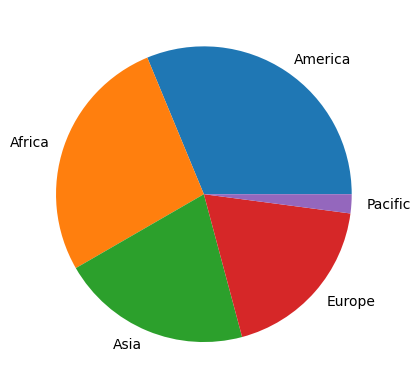

In [26]:

keys = plant_data["continent"].unique()
from transform import remove_duplicate_plants

unique_plants = remove_duplicate_plants(plant_data)
plant_continents = unique_plants[["continent"]].value_counts()

plt.pie(plant_continents, labels=keys)

plt.show()